In [1]:
from dotenv import load_dotenv
from langchain_perplexity import ChatPerplexity
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


In [2]:
load_dotenv()

True

In [4]:
model = ChatPerplexity()

In [3]:
class LLMstate(TypedDict):
    question:str
    answer: str

In [7]:
def LLM_QA(state:LLMstate) -> LLMstate:
    question = state['question']

    prompt = f"Answer the following question: {question}"
    answer = model.invoke(prompt).content

    state['answer'] = answer 

    return state



In [8]:
graph = StateGraph(LLMstate)
graph.add_node('LLM_QA',LLM_QA)

graph.add_edge(START,'LLM_QA')
graph.add_edge('LLM_QA',END)

workflow = graph.compile()

In [9]:
initial_state= {'question' : 'How can we become good software engineer in the Era of Ai?'}
final_state = workflow.invoke(initial_state)
print(final_state['answer'])

To become a good software engineer in the era of AI, master core engineering fundamentals like problem-solving, system design, data structures, algorithms, and scaling systems while integrating AI tools into your workflows for coding, debugging, and decision-making.[2][3][4]

### Essential Technical Skills
Focus on these AI-augmented skills, which build on traditional software engineering:
- **Programming proficiency**: Prioritize Python, R, C++, Java, or Julia for AI algorithms, models, data analysis, and automation.[2]
- **AI integration**: Use AI for coding, error handling, bug fixing, and prompt engineering to generate efficient solutions; learn to scale AI systems, manage throughput/latency, and integrate AI into existing workflows.[1][4]
- **Agentic AI and context engineering**: Build and understand AI agents, subagents, prompts, contexts, memory, tools, and workflows; this replaces rote coding expertise as AI handles most implementation.[1][3][5]
- **Data and ML basics**: Handle

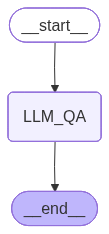

In [10]:
from IPython.display import Image 
Image(workflow.get_graph().draw_mermaid_png())